# Flower age project

## Objective

The aim of this research project is to quantify the lifespan and conditions of some selected flowers and fruits present in the natural population of the Antirrhinum majus; commonly known as snapdragon, as part of a bigger research studying the ecological and evolutionary dynamics in the hybrid zone between two populations that differ in color, the magenta A.majus pseudomajus and the yellow A. majus striatum. 

## Methods

As part of the study on the hybrid zone every snapdragon is given an ID conformed by a combination of a letter and four numbers, which allows us to keep a record on such variables as the number of flowers, stems, fruits, among others that are registered every day.

In order to track the specific flowers for this research green rings were placed just above each bud prior to the flower opening, as it is shown in the next figure. In conjunction the number on the green rings and ID tag were used to record the data of 274 flowers from 118 plants.

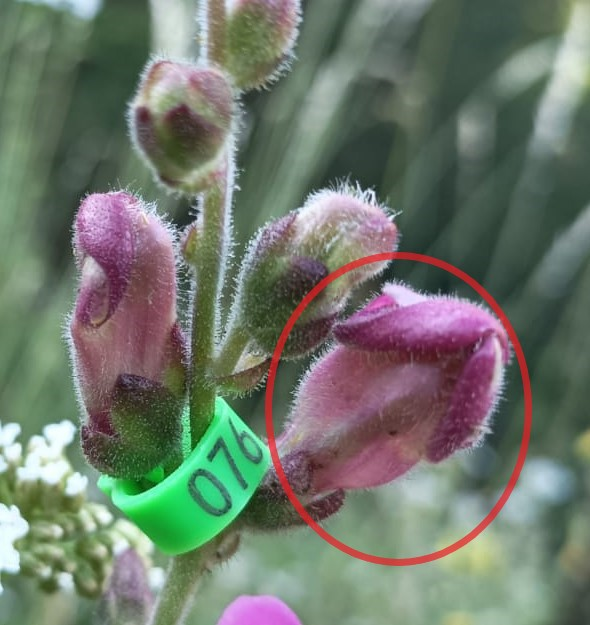
Figure 1. Positioning of rings 

The condition of the flower was taken into consideration as part of determining the lifespan of the flower, being if it is open (denoted with an O) recognized as when the flower is fully developed with both lower and upper lips extended with its palate exposed; closed (C) still a bud with the lips closed, if it has fallen (F) and for the formation of a fruit (FR)

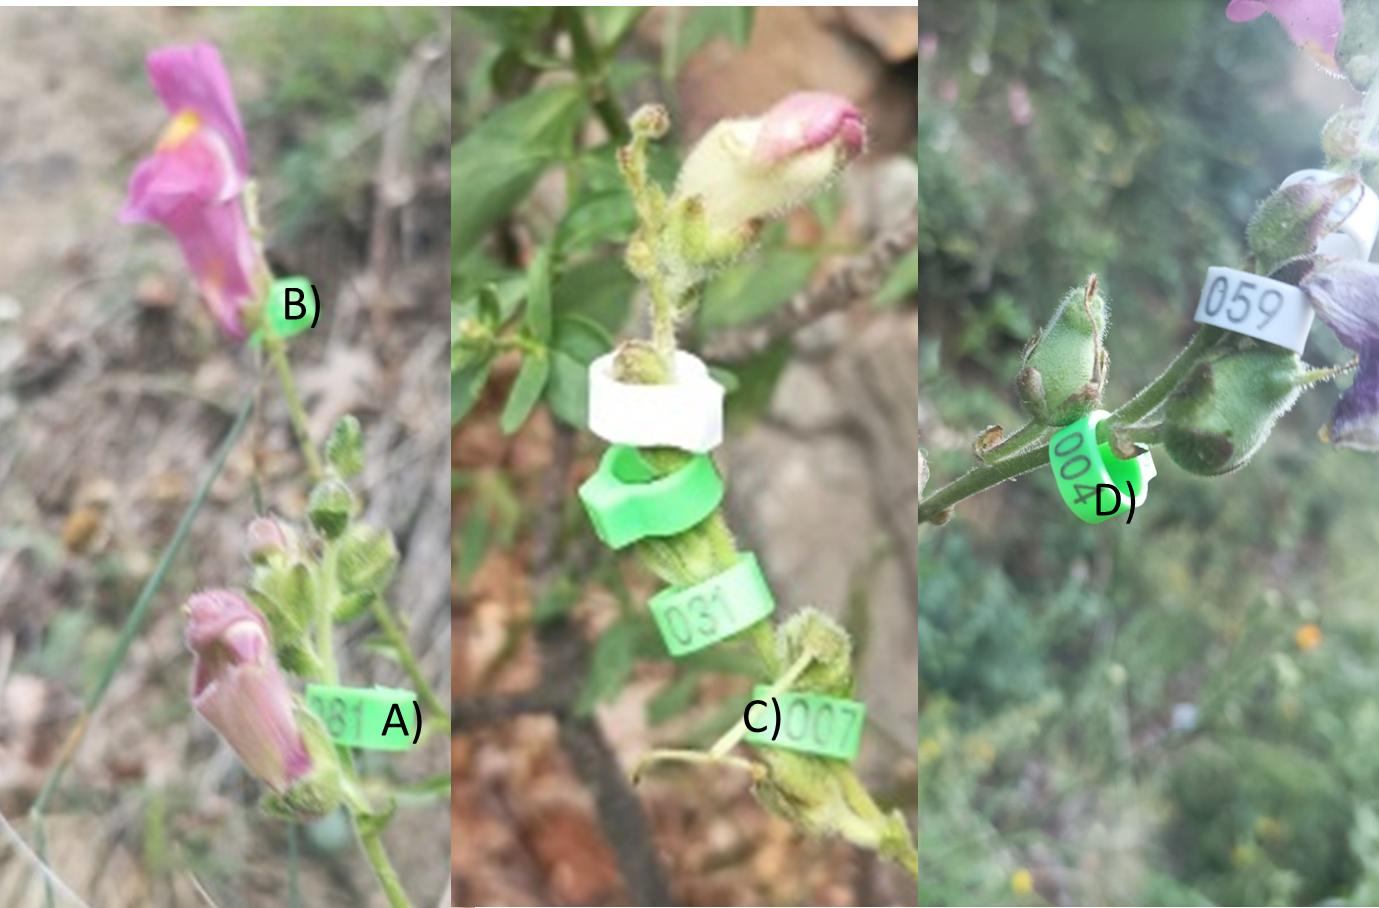
Figure 2. Examples of status of flowers A) Closed B) Open C) Fallen D) Fruit

The perceived age of the flower denoted by a scale between 1 and 4 was used to determine their decay based on the general rigidity and stiffness of the petals along with the brightness on the flower color, the number 4 is reserved for death flowers still attached to the stem.

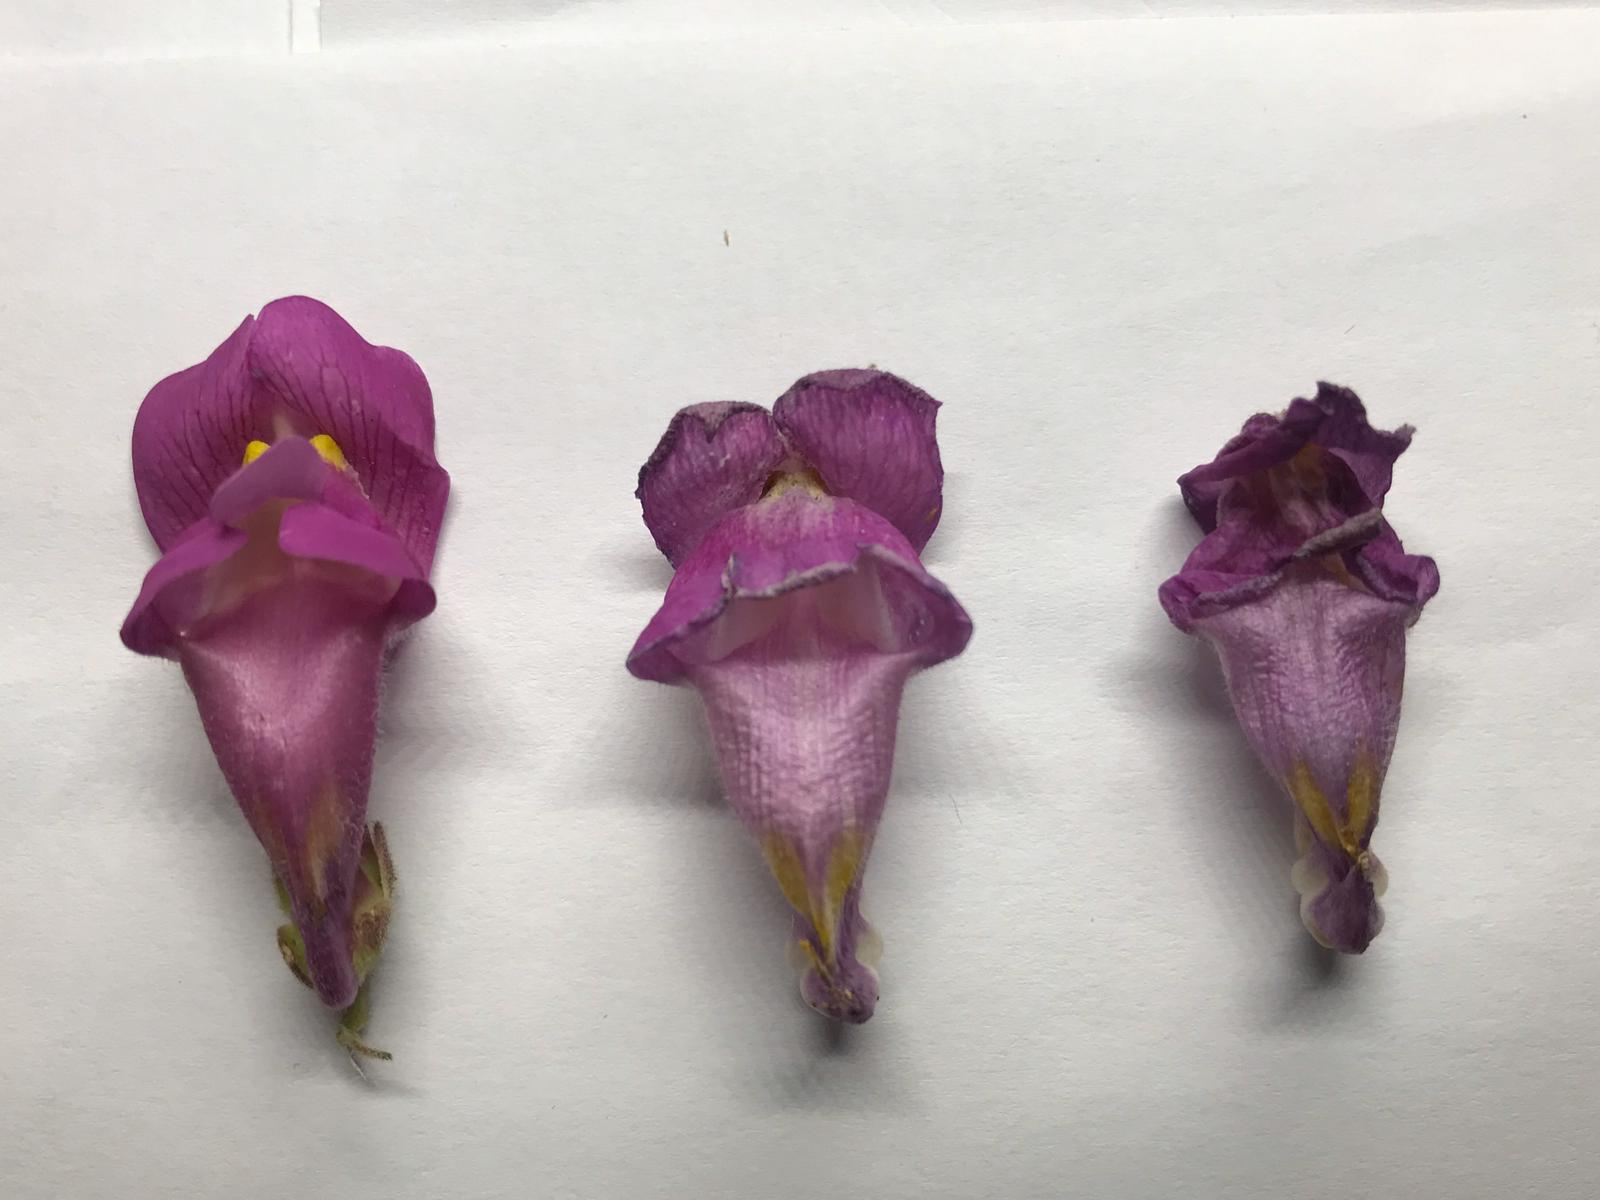
Figure 3. Flower perceived age from 1 to 3

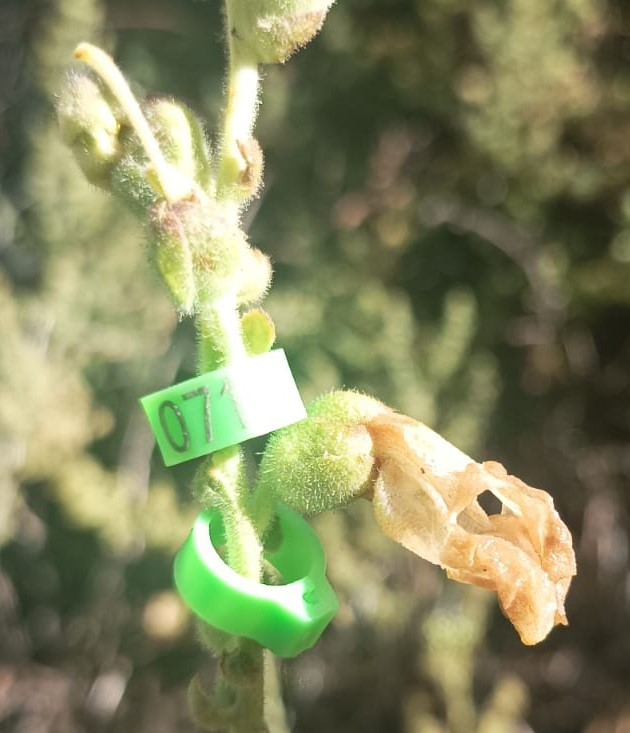
Figure 4. Perceived age 4 death flower still attached

Counted: CHECK

The other variable considered when recording data on the flowers is the damage, scaled in 0 to 3, 0 representing none and 3 considered enough to deteriorate the flowers reproductive system.

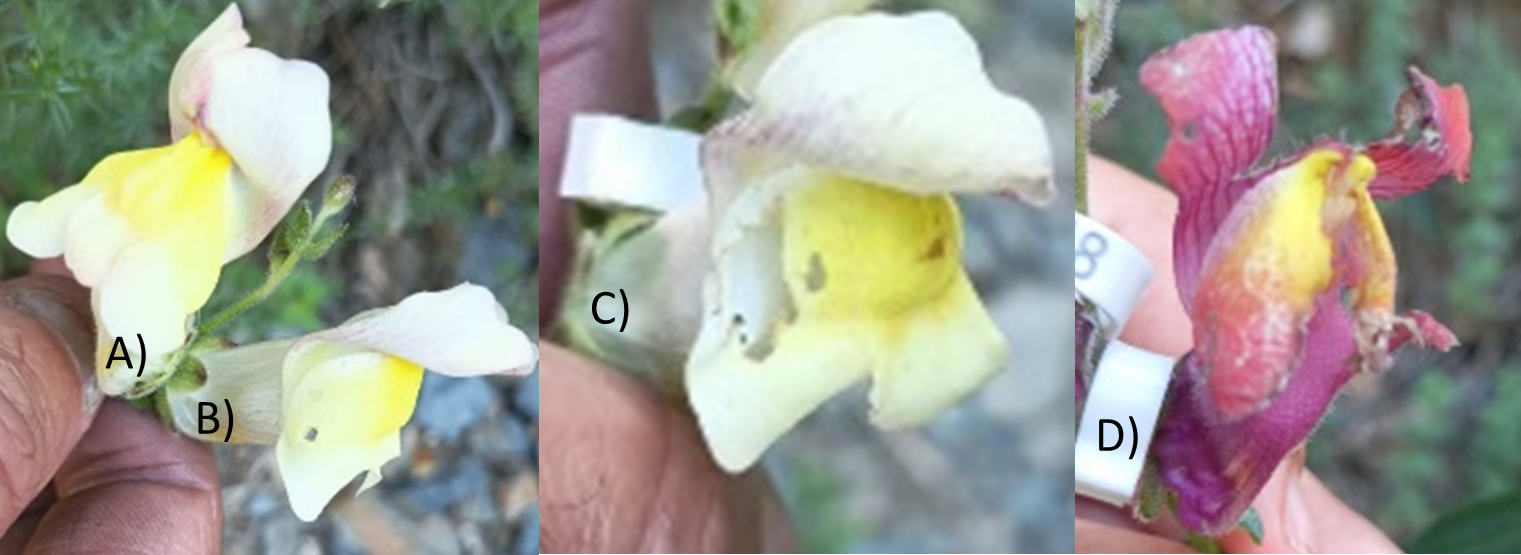
Figure 5. Different levels of damage in tracked flowers A) None damage B) Damage 1 C) Damage 2 D)Damage 3

Additionally, some of the records contain comments with information relevant to the development and life of the flowers such as the politization by bees, deformations or predation by insects or animals.

The lifespan of a flower is measured as the number of days between the first day when it was recorded as open and the first day recorded as fallen including this days; thus the minimun number for the lifespan of a flower is 2 days. The data is preserved in two csv files, the Flower_Info file has the information recorded on the day of the ring positioning and the Flower_Life file which contains the variables presented previously and the day of recording. 

## Code

Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import math

Close all previous graph and stablish directory for files.


Flower_Info: Contains the data from the ringing days, the day in which the ring was placed, the plant ID, the flower ID that is equal to the green ring number and the inmediate white ring under the green ring. 

Flower_Life: Contains the data from the daily records, the plant and flower ID, the day of recording, status of the flower, damage, if it is counted or not as a flower in the daily record of total number of flowers per plant and comments.


In [ ]:
plt.close("all")

dire='C:/Users/ferad/OneDrive/Escritorio/ISTA/FlowerAge/'
info_original=pandas.read_csv(dire+'Flower_Info.csv')
life_original=pandas.read_csv(dire+'Flower_Life.csv')

Keeping original data frames from the files and copying them to new data frames in order to work with a new general ID combining the ID from the plant and the flower

In [10]:
life=life_original.copy()
a=life['ID'].tolist()
b=life['Green'].tolist()
b=[int(num) for num in b]
b=list(map(lambda x:str(x),b))
newid=list(map(lambda x,y:x+'-'+y,a,b))
life['ID']=newid
del life['Green']
life.sort_values(by=['Day'])

info=info_original.copy()
a=info['ID'].tolist()
b=info['Flower_id'].tolist()
b=[int(num) for num in b]
b=list(map(lambda x:str(x),b))
newid=list(map(lambda x,y:x+'-'+y,a,b))
info['ID']=newid
del info['Flower_id'] 
del newid,a,b

## Function to get individual graph of a flower perceived age and lifespan.

In [12]:
def graph(ID,data): #individual graph per flower
    flower=data[(data["ID"]==ID) 
                &(data["Open/Closed/Fallen"]!="C")]
    flower.sort_values("Day",axis=0,ascending=True)
    age=flower['Age(1-4)'].values
    life=flower['Counted'].values
    age2=[]
    life2=[]
    x=[]
    a=0
    for i in range(len(age)):
        if(life[i]=='Y'):
            life2.append(1)
            a=a+1
            x.append(a)
        else:
            life2.append(0)
            a=a+1
            x.append(a)
        if(age[i]==1):
            age2.append(1)
        elif(age[i]==2):
            age2.append(0.66)
        elif(age[i]==3):
            age2.append(0.33)
        else:
            age2.append(0)

    plt.figure()
    plt.step(x,age2)
    plt.title('Perceived age')
    plt.xlabel('Days')
    plt.ylabel('Decay')
    
    plt.figure()
    plt.step(x,life2)
    plt.title('Lifespan')
    plt.xlabel('Days')
    plt.ylabel('Life of the flower')
    
    return(age2,life2)

Trial with the plant: PC0210 and green ring: 010

([1, 1, 1, 0.33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

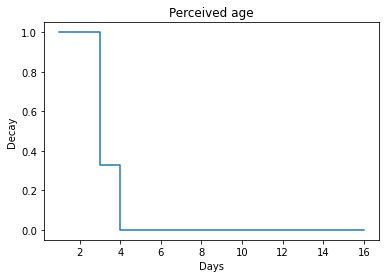

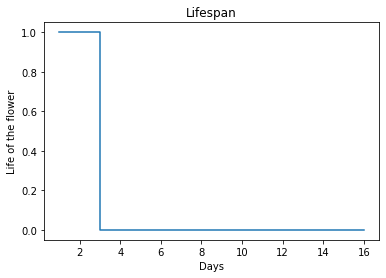

In [13]:
graph('PC0210-10',life) 

Create data frame named dataOpen for all the flowers that opened

Copies the rows from the life dataframe where the status is Open, groups them by ID, sorts them from least to greatest and drops the duplicates, taking just the first day with the status opening per flower.

In [ ]:
dataOpen=life.loc[lambda life: life['Open/Closed/Fallen']=='O', :]
dataOpen=dataOpen.loc[dataOpen.groupby('ID')['Day'].agg(['idxmin']).stack()].drop_duplicates()

Preparing empty lists for new variables in dataOpen data frame.


Combine all the comments from the same flower

Get days of important status changes. Stop being counted, Fallen, Death: Open and not counted or Fallen

Get lifespan: Difference between first open day and death day counting the death day

Calculate days between death flower and formation of fruit with inclusive range

In [ ]:
nCounted=[]
Fday=[]
lifespan=[]
FRday=[]
fruitDays=[]
comments=[]
death=[]

for i in (dataOpen.index): #Get data flowers that opened
    Oday=dataOpen.loc[i,'Day'] #opening day
    #Add Comments 
    com=life.loc[lambda life: life['ID']==life.iloc[i,0],'Comments'].tolist()
    comment=""
    for j in com:
        j=str(j)
        if j!='nan':
            comment=comment+" "+j
    comments.append(comment)
    
    #Add States
    states=life.loc[lambda life: (life['ID']==life.iloc[i,0]),'Open/Closed/Fallen'].tolist() #takes status as list
    counted=life.loc[lambda life: (life['ID']==life.iloc[i,0]),'Counted'].tolist() #takes counted as list
    days=life.loc[lambda life: (life['ID']==life.iloc[i,0]),'Day'].tolist() #takes days as list
    days=np.array(days).astype(int)
    count=[]
    fday=[]
    frday=[]
    for k in range(len(states)):
        if (states[k]=='O') & (counted[k]=='N'): #Adds the day when the flower stop counting as alive
            count.append(days[k])
        if states[k]=='F': #adds the day with status of fallen
            fday.append(days[k])
        if states[k]=='FR': #adds the day with status of fruit
            frday.append(days[k])
    try: #get minimun day for every list, if its empty add NAN
        count=min(count)
    except:
        count=np.nan
    try:
        fday=min(fday)
    except:
        fday=np.nan
    try:
        frday=min(frday)
    except:
        frday=np.nan
    
    #add variables per flower to lists for data frame
    nCounted.append(count)
    Fday.append(fday)
    FRday.append(frday)
    
    """
    Calculate lifespan as the difference between the day of death:
    Open and not counted(priority) or Fallen
    plus 1 counting the day recorded as death
    """
    if str(count).isnumeric(): 
        lifespan.append(count-Oday+1)
        death.append(count)
    elif str(fday).isnumeric():
        lifespan.append(fday-Oday+1)
        death.append(fday)
    else:
        lifespan.append(np.nan)
        death.append(np.nan)
    
    #Calculate days between death flower and formation of fruit with inclusive range
    if str(frday).isnumeric():
        fruitDays.append(frday-death[len(death)-1]+1)
    else:
        fruitDays.append(frday)

Erasing not used columns and adding new variables.


Stop counting: Day when the flower first was recorded as Open but not counted

Day Fallen: Day when the flower first was recorded as F

Death: Day when the flower is counted as death either Open and not counted or Fallen

Lifespan: Difference between first opening day and death day with inclusive range

Fruit Day: First day with FR recording

Days for fruit: Difference between death day and Fruit day with inclusive range

Comments: All comments from life file concatenated

In [ ]:
del dataOpen['Open/Closed/Fallen'],dataOpen['Age(1-4)'],dataOpen['Comments'],dataOpen['Damage(0-3)'],dataOpen['Counted']
    
dataOpen['Stop counting']=nCounted
dataOpen['Day Fallen']=Fday
dataOpen['Day death']=death
dataOpen['Lifespan']=lifespan
dataOpen['Fruit Day']=FRday
dataOpen['Days for fruit']=fruitDays
dataOpen['Comments']=comments

Get mean and standar desviation for the Lifespan and Days for fruit

In [26]:
lifespanMean=np.mean(dataOpen['Lifespan'].tolist())
lifespanSTD=np.std(dataOpen['Lifespan'].tolist())
fruitMean=np.mean(dataOpen['Days for fruit'].tolist())
fruitSTD=np.std(dataOpen['Days for fruit'].tolist())

desLifespan=dataOpen.describe()
lifespanMean=desLifespan.iloc[1,3]
lifespanSTD=desLifespan.iloc[2,3]
fruitMean=desLifespan.iloc[1,6]
fruitSTD=desLifespan.iloc[2,6]
    
print('Mean lifespan of flowers: '+ str(lifespanMean))
print('STD lifespan of flowers: '+ str(lifespanSTD))
print('Mean of days to get a fruit: '+ str(fruitMean))
print('STD of days to get a fruit: '+ str(fruitSTD))

print('////////////////////////////////////////////////////')
print('General information:')
print('Total number of flowers tracked: '+str(len(info)))
print('Number of flowers that opened: '+ str(int(desLifespan.iloc[0,0])))
print('Number of flowers with a full lifespan recordered: '+ str(int(desLifespan.iloc[0,3])))
print('Number of flowers with death recorded as Open and stop counting: '+ str(int(desLifespan.iloc[0,1])))
print('Number of flowers with death recorded as Fallen: '+ str(int(desLifespan.iloc[0,2])))
print('Number of flowers that developed into a fruit: '+ str(int(desLifespan.iloc[0,5])))
print('Percentage of flowers that developed into a fruit: '+ str(round(desLifespan.iloc[0,5]*100/desLifespan.iloc[0,3],2))+'%')


Mean lifespan of flowers: 4.019455252918288
STD lifespan of flowers: 1.0362619189140565
Mean of days to get a fruit: 5.768656716417911
STD of days to get a fruit: 2.323188692469731
////////////////////////////////////////////////////
General information:
Total number of flowers tracked: 274
Number of flowers that opened: 263
Number of flowers with a full lifespan recordered: 257
Number of flowers with death recorded as Open and stop counting: 40
Number of flowers with death recorded as Fallen: 237
Number of flowers that developed into a fruit: 134
Percentage of flowers that developed into a fruit: 52.14%


Function of histogram

In [18]:
def histogram(values,x,y,title):
    values = [x for x in values if math.isnan(x) == False]
    values= np.array(values, dtype='int')
    interval= [*range(min(values),max(values)+1)]
    histogram=[0]*len(interval)
    for i in values:
        ind=interval.index(i)
        histogram[ind]=histogram[ind]+1
        
    plt.figure()
    plt.bar(interval,histogram)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

Creation of histogram graphs for the lifespan of all the flowers that opened and the amount of days for the formation of a fruit since the recording of the death flower

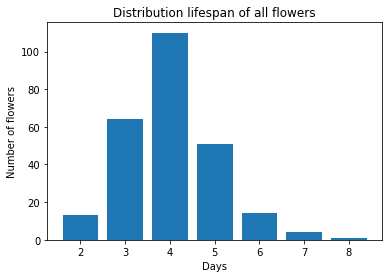

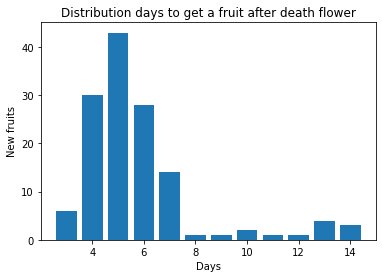

In [19]:
histogram(dataOpen['Lifespan'].tolist(),'Days','Number of flowers','Distribution lifespan of all flowers')
histogram(dataOpen['Days for fruit'].tolist(),'Days','New fruits','Distribution days to get a fruit after death flower')

## Dividing the data from the flowers that open depending if they have formed a flower or not

In [ ]:
Fruit=dataOpen.loc[lambda life: life['Days for fruit']>0, :]
nonFruit=dataOpen.loc[lambda life: life['Days for fruit'].isnull(), :]

In [27]:
desFruit=Fruit.describe()
desNoFruit=nonFruit.describe()

lifeFRMean=desFruit.iloc[1,3]
lifeFRSTD=desFruit.iloc[2,3]
lifeNoFRMean=desNoFruit.iloc[1,3]
lifeNoFRSTD=desNoFruit.iloc[2,3]
    
print('Mean lifespan of flowers that turned into a fruit: '+ str(lifeFRMean))
print('STD lifespan of flowers that turned into a fruit: '+ str(lifeFRSTD))
print('Mean lifespan of flowers that did not turned into a fruit: '+ str(lifeNoFRMean))
print('STD lifespan of flowers that did not turned into a fruit: '+ str(lifeNoFRSTD))

Mean lifespan of flowers that turned into a fruit: 4.097014925373134
STD lifespan of flowers that turned into a fruit: 0.8305211968530216
Mean lifespan of flowers that did not turned into a fruit: 3.934959349593496
STD lifespan of flowers that did not turned into a fruit: 1.219646800514858


## Separate data for every ringing day

Information per ringing day:
   Ringing Day  Average Lifespan        SD
0           47          3.861386  1.024741
1           48          3.642857  0.811273
2           49          4.571429  1.094202
3           51          4.421053  1.532655
4           53          4.112360  0.853785


Text(0, 0.5, 'Average Lifespan')

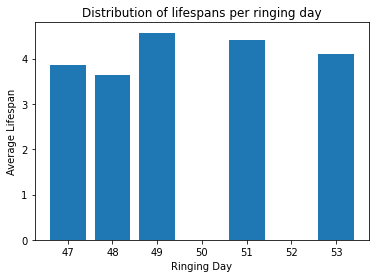

In [47]:
ringingDays=info['Day'].tolist()
ringingDays=list(dict.fromkeys(ringingDays))
ringingDays.sort() #organized list of every ringing day

data=dataOpen.dropna(subset = ["Lifespan"])  #data, data frame without plants with incomplete lifespans
lifespanDay=[]
sdDay=[]
df= info[info['ID'].isin(data['ID'].tolist())] #data frame from ringing file with only flowers with complete lifespans
for i in ringingDays:
    perDay=[]
    ids=df.loc[lambda df:df['Day']==i,'ID'].tolist() #get ids if the ringing day matchs
    for j in ids:
        perDay.append(float(data.loc[lambda data: data['ID']==j,'Lifespan'])) #get lifespan if the ids matchs
    lifespanDay.append(np.mean(perDay)) #get mean
    sdDay.append(np.std(perDay)) #get std

dictionary={'Ringing Day':ringingDays,'Average Lifespan':lifespanDay,'SD':sdDay}
lifespanRingingDay=pandas.DataFrame(dictionary)

print('Information per ringing day:')
print(lifespanRingingDay)

plt.figure()
plt.bar(ringingDays,lifespanDay)
plt.title('Distribution of lifespans per ringing day')
plt.xlabel('Ringing Day')
plt.ylabel('Average Lifespan')  

## Separate data for every plant.


O day: Opening day

N day: Day recorded as Open but stop counting

F day: Fallen day

Death day: First day N or F

Lifespan: Difference between Death day and Opening day with  inclusive range

Days for FR: Days between death day and fruit day, inclusive range

Comments: All comments on that flower



Trial plant:PB4713

In [57]:
columns=['ID','O day','N day','F day','Lifespan','Death day','FR day','Days for FR','Comments']
dataPlant = []
plant='PB4713'

for row in dataOpen.itertuples(index=False):
    if row[0].__contains__(plant):
        dataPlant.append(list(row))

dataPlant=pandas.DataFrame(dataPlant, columns=columns)

print(dataPlant)

          ID  O day  N day  F day  Lifespan  Death day  FR day  Days for FR  \
0  PB4713-12     48   53.0    NaN       6.0       53.0    57.0          5.0   
1  PB4713-35     48    NaN   52.0       5.0       52.0    55.0          4.0   
2   PB4713-4     49    NaN   51.0       3.0       51.0    57.0          7.0   
3  PB4713-96     54    NaN   59.0       6.0       59.0     NaN          NaN   
4  PB4713-98     55    NaN   59.0       5.0       59.0    63.0          5.0   

             Comments  
0        MISSING INFO  
1   FRUIT DEVELOPMENT  
2                      
3                      
4                      


## Data per plant

In [60]:
plantName=info_original['ID'].unique().tolist()  #unique list of all plants
avLifeP=[]
desLifeP=[]
avFrP=[]
desFrP=[]
noFl=[]

for i in plantName: #for every plant
    lifespanPlant=[]
    fruitPlant=[]
    flowers=0
    for row in dataOpen.itertuples(index=False): #for every entry on opened flowers
        if row[0].__contains__(i): #if there is a match between the entry and the plant name
            flowers=flowers+1
            if row[4]==np.nan:
                lifespanPlant.append(0)
            else:
                lifespanPlant.append(row[4])
            if row[7]==np.nan:
                fruitPlant.append(0)
            else:
                fruitPlant.append(row[7])
    noFl.append(flowers)
    if len(lifespanPlant)!=0:
        avLifeP.append(np.mean(lifespanPlant))
        desLifeP.append(np.std(lifespanPlant))
    else: #in case the plant does not have a flower with a complete lifespan (stoped being recordered before death)
        avLifeP.append(np.nan)
        desLifeP.append(np.nan)
    if len(fruitPlant)!=0: 
        avFrP.append(np.mean(fruitPlant))
        desFrP.append(np.std(fruitPlant))
    else: #if the plant's flowers never became fruits
        avFrP.append(np.nan)
        desFrP.append(np.nan)
    
dictionary={'ID':plantName,'Mean Lifespan':avLifeP,'STD Lifespan':desLifeP,
            'Mean days to Fr':avFrP,'STD days to Fr':desFrP,'NoFlowers':noFl}
Plants=pandas.DataFrame(dictionary)

print('Information on flower life per plant:')
print('Example of first 3 plants')
print(Plants[0:3])

Information on flower age per plant:
Example of first 3 plants
       ID  Mean Lifespan  STD Lifespan  Mean days to Fr  STD days to Fr  \
0  PC0210            4.0           0.0              8.0        3.559026   
1  PC0259            4.0           0.0              NaN             NaN   
2  PB0345            4.0           0.0              5.0        0.000000   

   NoFlowers  
0          3  
1          3  
2          1  


## Graphs of the distribution on mean lifespan, days to fruit and number of flowers tracked on each plant 

Text(0, 0.5, 'Average of days')

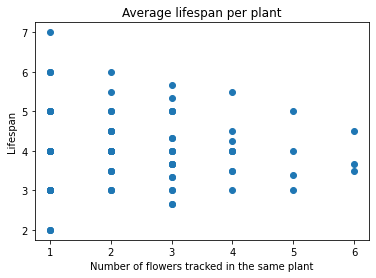

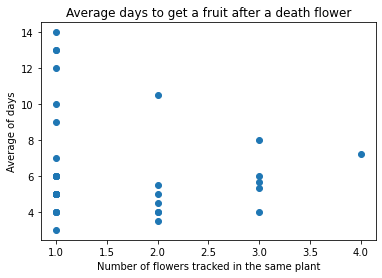

In [64]:
plt.figure()
plt.scatter(Plants['NoFlowers'],Plants['Mean Lifespan'])
plt.title('Average lifespan per plant')
plt.xlabel('Number of flowers tracked in the same plant')
plt.ylabel('Lifespan')   


plt.figure()
plt.scatter(Plants['NoFlowers'],Plants['Mean days to Fr'])
plt.title('Average days to get a fruit after a death flower')
plt.xlabel('Number of flowers tracked in the same plant')
plt.ylabel('Average of days')   

## Proposed next things to do:

1) Add graphs of accumulative lifespan and decay per plant

2) Mersh information from plants survey :

    a. Does the number of flowers per plant affect the lifespan/formation of fruits?
    
    b. Does the size of the plant (number of stems and flowers) affect the lifespan/formation of fruits?
    
    c. Competition for resources, Does the distance between plants affects the number of flowers/lifespan/formation of fruits?
    
    d. Does polinization affect the lifespan/formation of fruits?
    
    e. Does predation affect the lifespan/formation of fruits?
    
3) Influence of damage and lifespan/formation of fruits

4) Influence of factors in comments in the lifespan/formation of fruits

5) Graph of correlation between lifespan and formation of fruits 
